In [1]:
########################### 导入必要的库
import tensorflow as tf
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np

2023-07-03 00:44:03.112798: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-03 00:44:03.114470: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 00:44:03.139245: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 00:44:03.139703: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 00:44:03.646638: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
########################### 准备数据，训练数据和测试数据
(train_data, train_lables) , (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
########################### 数据预处理
def vectorize_sequences(sequences, dimension=10000):
     results = np.zeros((len(sequences), dimension))
     for i, sequence in enumerate(sequences):
         results[i, sequence] = 1.
     return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_lables).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
########################### 将后1万行数据作为验证数据，前1万行数据作为训练数据
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [4]:
tf.shape(x_train)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25000, 10000], dtype=int32)>

In [5]:
########################### 构建模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

########################### 构建损失函数、优化器、指标
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________


In [6]:
########################### 训练模型
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5123 - acc: 0.7432 - val_loss: 0.3445 - val_acc: 0.8721
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2931 - acc: 0.8889 - val_loss: 0.2894 - val_acc: 0.8840
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2243 - acc: 0.9158 - val_loss: 0.2770 - val_acc: 0.8875
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1743 - acc: 0.9363 - val_loss: 0.2850 - val_acc: 0.8857
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1496 - acc: 0.9445 - val_loss: 0.2893 - val_acc: 0.8861
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1269 - acc: 0.9537 - val_loss: 0.3208 - val_acc: 0.8815
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0918 - acc: 0.9690 - val_loss: 0.3289 - val_acc: 0.8793
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0854 - a

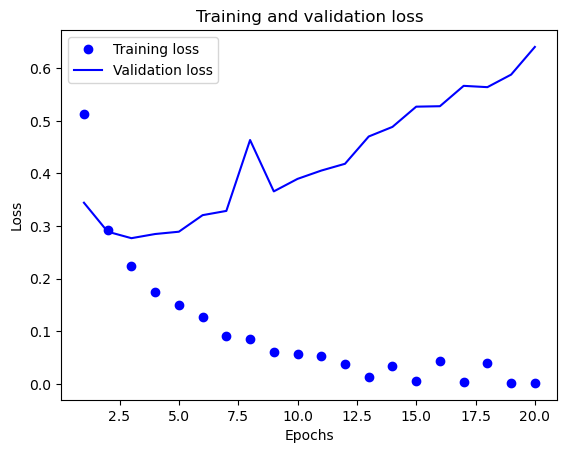

In [7]:
########################### 绘制结果

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

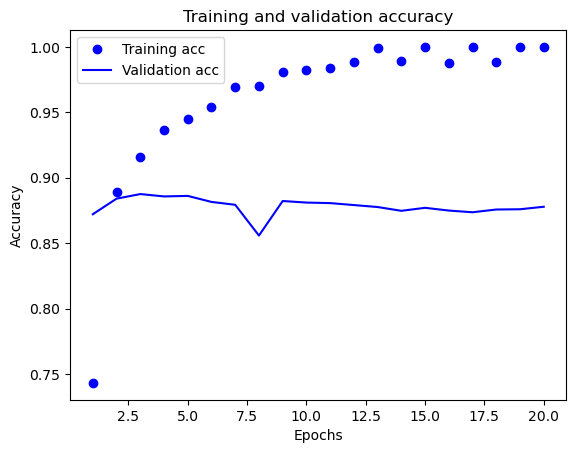

In [8]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()